In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


In [2]:
# Read raw csv file and view it.
listing_data = pd.read_csv("clean_data_rs/airbnbFINAL_Swobabika.csv", low_memory=False, encoding="UTF-8")
listing_data.head()

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd,station_distance
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,94,9,10,94,9,9,9,0.15,5.205174,1.4
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,98,10,10,98,10,10,10,1.75,3.649571,1.1
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,97,10,10,97,10,9,10,0.60,5.437003,1.2
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,99,10,9,99,10,10,10,2.07,0.072335,0.5
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,95,9,10,95,10,10,9,0.46,2.794548,0.5


## Basic clean up and filtering of relevant Data.

In [3]:
# Get the column names so that necessary column names can be extracted.
listing_data.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd', 'station_distance'],
      dtype='object')

In [4]:
# Get the data with relevant columns into a new dataframe and view it.
price_airbnb_data = listing_data[["city","property_type","accommodates","price"]]
price_airbnb_data

,city,property_type,accommodates,price
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
8922,Melbourne,Apartment,5,156.0
8923,Brunswick West,House,6,199.0
8924,Port Melbourne,Apartment,4,140.0
8925,Preston,Apartment,2,71.0


In [5]:
# Rename columns for better readability
price_data_renamed=price_airbnb_data.rename(columns={"city":"Suburbs", 
                                                     "price":"Price/Day($)" })
price_data_renamed

,Suburbs,property_type,accommodates,Price/Day($)
0,St Kilda,Apartment,3,159.0
1,Richmond,Apartment,2,98.0
2,St Kilda,Apartment,4,190.0
3,Melbourne,Loft,4,228.0
4,Richmond,Apartment,4,138.0
...,...,...,...,...
8922,Melbourne,Apartment,5,156.0
8923,Brunswick West,House,6,199.0
8924,Port Melbourne,Apartment,4,140.0
8925,Preston,Apartment,2,71.0


In [6]:
# check datatype to make sure price columns are numerical
price_data_renamed.dtypes

Suburbs           object
property_type     object
accommodates       int64
Price/Day($)     float64
dtype: object

In [7]:
# Convert Price/Day Column to integer type
price_data_renamed["Price/Day($)"] = price_data_renamed["Price/Day($)"].astype('int64')
price_data_renamed.dtypes

Suburbs          object
property_type    object
accommodates      int64
Price/Day($)      int64
dtype: object

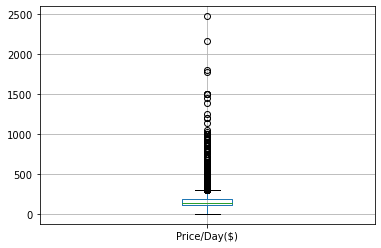

In [8]:
# Check via box and whisker plot if there are extreme values in the dataset.
price_data_renamed.boxplot(column='Price/Day($)', return_type='axes')

In [9]:
# Making sure unique values show extreme values
c=price_data_renamed['Price/Day($)'].unique()
c.sort()
print(c)

[   0   12   30   39   40   46   47   48   50   53   54   55   57   58
   60   61   62   64   65   66   68   69   71   72   73   75   76   78
   79   80   82   83   84   86   87   89   90   91   93   94   96   97
   98  100  101  102  104  105  107  108  109  111  112  114  115  116
  118  119  120  121  122  123  125  126  127  129  130  132  133  134
  136  137  138  140  141  143  144  145  147  148  150  151  152  154
  155  156  158  159  161  162  163  165  166  168  169  170  172  173
  174  176  177  179  180  181  183  184  186  187  188  190  191  192
  194  195  197  198  199  202  203  205  206  208  209  210  212  213
  215  216  217  219  220  221  224  226  227  228  230  233  234  235
  237  238  239  241  242  244  245  246  248  249  251  255  256  257
  259  260  262  264  266  269  270  271  275  277  278  280  285  287
  288  289  291  293  295  296  298  299  300  302  305  307  309  310
  316  317  318  320  321  323  324  325  327  329  332  334  335  336
  338 

In [10]:
# Clean price data for extreme values i.e. rows with values=0 and <2500 price/day values.
price_data_cleaned = price_data_renamed.loc[(price_data_renamed["Price/Day($)"] > 0) &
                                            (price_data_renamed["Price/Day($)"] < 2500)]
len(price_data_cleaned)

8924

In [11]:
# Making sure extereme values are removed from dataset.
b= price_data_cleaned['Price/Day($)'].unique()
b.sort()
print(b)

[  12   30   39   40   46   47   48   50   53   54   55   57   58   60
   61   62   64   65   66   68   69   71   72   73   75   76   78   79
   80   82   83   84   86   87   89   90   91   93   94   96   97   98
  100  101  102  104  105  107  108  109  111  112  114  115  116  118
  119  120  121  122  123  125  126  127  129  130  132  133  134  136
  137  138  140  141  143  144  145  147  148  150  151  152  154  155
  156  158  159  161  162  163  165  166  168  169  170  172  173  174
  176  177  179  180  181  183  184  186  187  188  190  191  192  194
  195  197  198  199  202  203  205  206  208  209  210  212  213  215
  216  217  219  220  221  224  226  227  228  230  233  234  235  237
  238  239  241  242  244  245  246  248  249  251  255  256  257  259
  260  262  264  266  269  270  271  275  277  278  280  285  287  288
  289  291  293  295  296  298  299  300  302  305  307  309  310  316
  317  318  320  321  323  324  325  327  329  332  334  335  336  338
  339 

### Generating Price/Day/Person data for further analysis

In [12]:
# Create a copy to retain original.
price_data_cleaned2 = price_data_cleaned.copy()

In [13]:
# Create a new column for price/day/person and fill calculated values
price_per_person = round((price_data_cleaned2['Price/Day($)']/price_data_cleaned2['accommodates']),2)
price_data_cleaned2['Price/Day/Person($)'] = price_per_person
price_data_cleaned2

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
3,Melbourne,Loft,4,228,57.00
4,Richmond,Apartment,4,138,34.50
...,...,...,...,...,...
8922,Melbourne,Apartment,5,156,31.20
8923,Brunswick West,House,6,199,33.17
8924,Port Melbourne,Apartment,4,140,35.00
8925,Preston,Apartment,2,71,35.50


## Price/Day/Person Analysis based on Property_Type

In [14]:
# Groupby on propert types and find the mean price/day/person for each type.
grouped_property_type = price_data_cleaned2.groupby('property_type')["Price/Day/Person($)"].mean().sort_values()
grouped_property_type

property_type
Apartment             44.434740
Townhouse             45.454167
House                 47.868563
Loft                  51.663689
Serviced apartment    58.880394
Name: Price/Day/Person($), dtype: float64

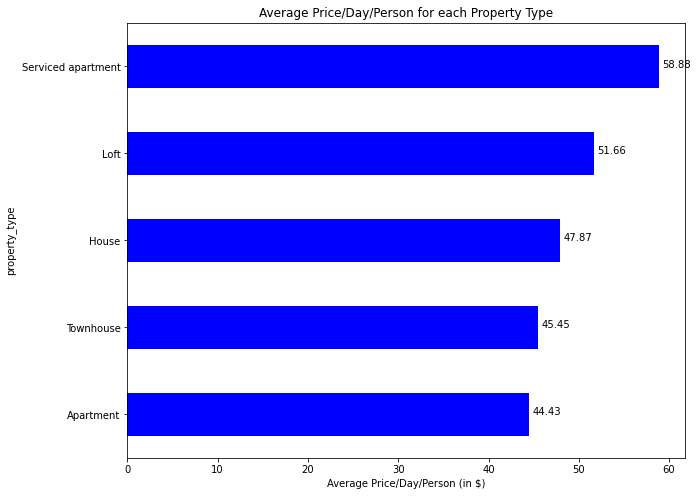

In [17]:
# Plot the average price/day/person based on property_type.
bplot3=grouped_property_type.plot(kind="barh",figsize=(10,8),color="blue")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Average Price/Day/Person for each Property Type")
for b in bplot3.patches:
    width = b.get_width()
    plt.text(2+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.savefig("Presentation Slides/Price_Output/PropertyType_Price.png")

In [18]:
# convert grouped property type dataseries to a Dataframe
property_type_DF =pd.DataFrame(grouped_property_type)
property_type_DF.reset_index(level=0, inplace=True)
property_type_DF

,property_type,Price/Day/Person($)
0,Apartment,44.434740
1,Townhouse,45.454167
2,House,47.868563
3,Loft,51.663689
4,Serviced apartment,58.880394


In [19]:
# Print Output Data.
print("Average Airbnb Prices based on property types in Melbourne metropolitan area are: ")
print("-----------------------------------------------------------------------------------")
for i in range(0,5):
    property_type=property_type_DF.iloc[i,0]
    price = round(property_type_DF.iloc[i,1],0)
    print(f"Average Price/Day/Person for a {property_type} in Metropolitan Melbourne is ${price}")

Average Airbnb Prices based on property types in Melbourne metropolitan area are: 
-----------------------------------------------------------------------------------
Average Price/Day/Person for a Apartment in Metropolitan Melbourne is $44.0
Average Price/Day/Person for a Townhouse in Metropolitan Melbourne is $45.0
Average Price/Day/Person for a House in Metropolitan Melbourne is $48.0
Average Price/Day/Person for a Loft in Metropolitan Melbourne is $52.0
Average Price/Day/Person for a Serviced apartment in Metropolitan Melbourne is $59.0


##  Suburb Analysis. 

In [20]:
# Check if entire row is the same datatype.
price_data_cleaned2['Suburbs'].apply(type).value_counts()

<class 'str'>    8924
Name: Suburbs, dtype: int64

In [21]:
suburb_names = price_data_cleaned2['Suburbs'].unique()
print(suburb_names)
print(len(suburb_names))

['St Kilda' 'Richmond' 'Melbourne' 'Fitzroy' 'Thornbury' 'Clifton Hill'
 'St Kilda East' 'Yarraville' 'Elwood' 'Middle Park' 'North Melbourne'
 'Caulfield North' 'Collingwood' 'Southbank' 'South Yarra' 'Windsor'
 'Abbotsford' 'East Melbourne' 'Balaclava' 'Brunswick' 'Elsternwick'
 'Flemington' 'Hawthorn East' 'South Melbourne' 'Port Melbourne'
 'Brighton' 'Caulfield South' 'St Kilda West' 'Brunswick East' 'Carlton'
 'Northcote' 'Fitzroy North' 'Kew' 'Toorak' 'Glen Iris' 'Prahran' 'Coburg'
 'Parkville' 'Docklands' 'Cremorne' 'Heidelberg' 'Maribyrnong' 'Footscray'
 'Brunswick West' 'Malvern East' 'West Melbourne' 'Kensington'
 'Albert Park' 'Camberwell' 'Hawthorn' 'Preston' 'Williamstown'
 'Ascot Vale' 'Armadale' 'Carlton North']
55


In [22]:
# Get all unique property types.
unique_property = price_data_cleaned2['property_type'].value_counts()
print(unique_property)

Apartment             7225
House                  974
Townhouse              324
Serviced apartment     279
Loft                   122
Name: property_type, dtype: int64


In [23]:
# Getting data for entire apartments only.
only_apartment = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Apartment"),:]
only_apartment

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
0,St Kilda,Apartment,3,159,53.00
1,Richmond,Apartment,2,98,49.00
2,St Kilda,Apartment,4,190,47.50
4,Richmond,Apartment,4,138,34.50
7,Clifton Hill,Apartment,4,180,45.00
...,...,...,...,...,...
8920,Melbourne,Apartment,2,134,67.00
8921,Melbourne,Apartment,3,112,37.33
8922,Melbourne,Apartment,5,156,31.20
8924,Port Melbourne,Apartment,4,140,35.00


In [24]:
# Getting data for entire townhouses only.
only_servapts = price_data_cleaned2.loc[(price_data_cleaned2["property_type"]=="Serviced apartment"),:]
only_servapts

,Suburbs,property_type,accommodates,Price/Day($),Price/Day/Person($)
36,Southbank,Serviced apartment,7,357,51.00
74,Southbank,Serviced apartment,5,230,46.00
509,St Kilda,Serviced apartment,6,120,20.00
566,East Melbourne,Serviced apartment,3,145,48.33
572,Melbourne,Serviced apartment,2,165,82.50
...,...,...,...,...,...
8733,Docklands,Serviced apartment,4,300,75.00
8776,South Melbourne,Serviced apartment,8,498,62.25
8824,Carlton,Serviced apartment,2,100,50.00
8878,Docklands,Serviced apartment,4,166,41.50


## APARTMENTS ONLY

### Analyse price data distribution with Price/Day/Person Column

In [25]:
# check if price/day data is normally distributed
# plt.hist(only_apartment['Price/Day/Person($)'])
normal_test = sts.normaltest(only_apartment['Price/Day/Person($)'].sample(70))
normal_test

NormaltestResult(statistic=88.57659939688824, pvalue=5.832245921556736e-20)

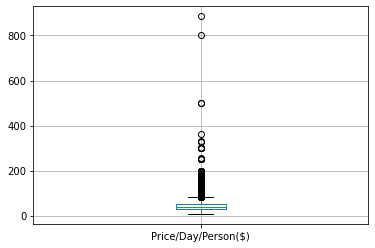

In [26]:
only_apartment.boxplot(column='Price/Day/Person($)', return_type='axes')

In [27]:
prices2=only_apartment['Price/Day/Person($)']
quartiles = prices2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
print(f"The upper quartile of price/day for entire apartment is: {upperq}")
print(f"The interquartile range of price/day for entire apartment is: {iqr}")
print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for entire apartments is: 29.75
The upper quartile of price/day for entire apartment is: 51.0
The interquartile range of price/day for entire apartment is: 21.25
The the median of price/days for entire apartment is: 38.75 
Values below -2.125 could be outliers.
Values above 82.875 could be outliers.


In [28]:
# Remove outliers and check number of data points  
outlier_filtered2 = only_apartment.loc[(only_apartment['Price/Day/Person($)'] > lower_bound)
                                        &(only_apartment['Price/Day/Person($)'] < upper_bound)]
len(outlier_filtered2)

6878

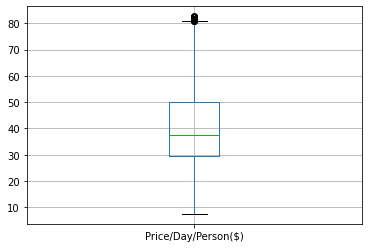

In [29]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered2.boxplot(column='Price/Day/Person($)', return_type='axes')

### TOP 10 Suburbs (for apartments only)

In [30]:
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_top = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Williamstown      45.296250
Windsor           45.326104
South Yarra       45.816029
East Melbourne    45.842889
Middle Park       45.886000
Port Melbourne    46.054103
Cremorne          46.427500
Prahran           46.573222
Albert Park       50.615385
Fitzroy           50.746160
Name: Price/Day/Person($), dtype: float64

In [31]:
# Checking with median values
#grouped_top_median = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].median().sort_values().tail(10)
#grouped_top_median

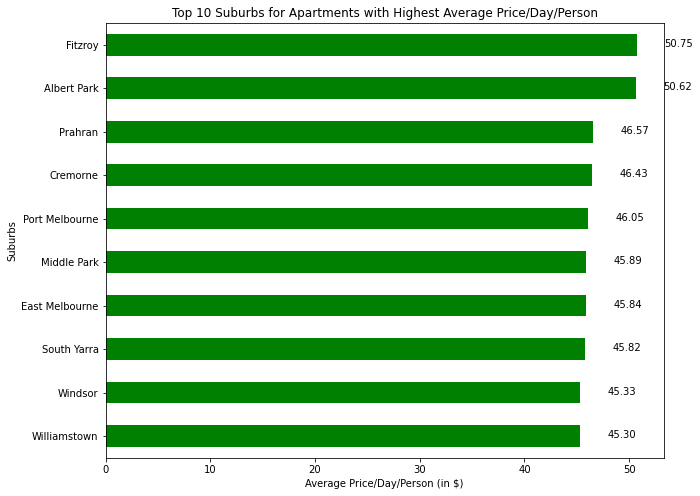

In [32]:
# Plot the top 10 suburbs with highest average per/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Top 10 Suburbs for Apartments with Highest Average Price/Day/Person")
for b in bplot.patches:
    width = b.get_width()
    plt.text(4+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.savefig("Presentation Slides/Price_Output/Apt_Top10_Price.png")

In [33]:
# convert top10 dataseries to a Dataframe
top_apt_DF=pd.DataFrame(grouped_top)
top_apt_DF.reset_index(level=0, inplace=True)
top_apt_DF

,Suburbs,Price/Day/Person($)
0,Williamstown,45.296250
1,Windsor,45.326104
2,South Yarra,45.816029
3,East Melbourne,45.842889
4,Middle Park,45.886000
5,Port Melbourne,46.054103
6,Cremorne,46.427500
7,Prahran,46.573222
8,Albert Park,50.615385
9,Fitzroy,50.746160


In [34]:
## Print Output Data.
print("Top 10 Suburbs with Highest Average Price/Day/Person for Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=top_apt_DF.iloc[i,0]
    suburb_price=round(top_apt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average price/day/person of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day/Person for Apartments are : 
-----------------------------------------
Williamstown has an average price/day/person of $45.0
Windsor has an average price/day/person of $45.0
South Yarra has an average price/day/person of $46.0
East Melbourne has an average price/day/person of $46.0
Middle Park has an average price/day/person of $46.0
Port Melbourne has an average price/day/person of $46.0
Cremorne has an average price/day/person of $46.0
Prahran has an average price/day/person of $47.0
Albert Park has an average price/day/person of $51.0
Fitzroy has an average price/day/person of $51.0


## BOTTOM 10 Suburbs (for apartments only)

In [35]:
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Coburg             28.046667
Ascot Vale         30.252222
Kew                31.938824
Elsternwick        32.328421
Thornbury          33.256774
Glen Iris          35.132778
Maribyrnong        35.263077
Kensington         35.658000
Caulfield South    35.862222
Brunswick West     35.911667
Name: Price/Day/Person($), dtype: float64

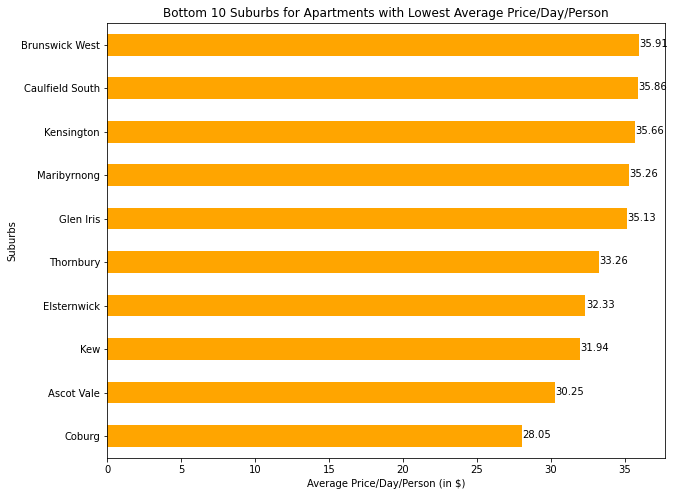

In [36]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Bottom 10 Suburbs for Apartments with Lowest Average Price/Day/Person")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(1+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.savefig("Presentation Slides/Price_Output/Apt_Bottom10_Price.png")

In [37]:
# convert bottom 10 dataseries to a Dataframe
bottom_apt_DF=pd.DataFrame(grouped_bottom)
bottom_apt_DF.reset_index(level=0, inplace=True)
bottom_apt_DF


,Suburbs,Price/Day/Person($)
0,Coburg,28.046667
1,Ascot Vale,30.252222
2,Kew,31.938824
3,Elsternwick,32.328421
4,Thornbury,33.256774
5,Glen Iris,35.132778
6,Maribyrnong,35.263077
7,Kensington,35.658000
8,Caulfield South,35.862222
9,Brunswick West,35.911667


In [38]:
# Print Output Data.
print("Top 10 Suburbs with Lowest Average Price/Day/Person for Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=bottom_apt_DF.iloc[i,0]
    suburb_price=round(bottom_apt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average Price/Day/Person of ${suburb_price}")

Top 10 Suburbs with Lowest Average Price/Day/Person for Apartments are : 
-----------------------------------------
Coburg has an average Price/Day/Person of $28.0
Ascot Vale has an average Price/Day/Person of $30.0
Kew has an average Price/Day/Person of $32.0
Elsternwick has an average Price/Day/Person of $32.0
Thornbury has an average Price/Day/Person of $33.0
Glen Iris has an average Price/Day/Person of $35.0
Maribyrnong has an average Price/Day/Person of $35.0
Kensington has an average Price/Day/Person of $36.0
Caulfield South has an average Price/Day/Person of $36.0
Brunswick West has an average Price/Day/Person of $36.0


## SERVICED APARTMENTS ONLY

### Analyse price data distribution with Price/Day/Person Column

In [39]:
len(only_servapts)

279

NormaltestResult(statistic=33.11214064214451, pvalue=6.453421290928729e-08)

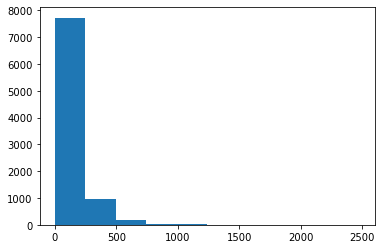

In [40]:
# check if price/day data is normally distributed
plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(only_servapts['Price/Day/Person($)'].sample(70))
normal_test

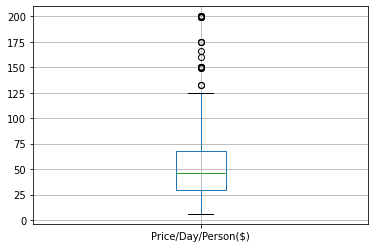

In [41]:
only_servapts.boxplot(column='Price/Day/Person($)', return_type='axes')

In [42]:
prices2=only_servapts['Price/Day/Person($)']
quartiles = prices2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for serviced apartments is: {lowerq}")
print(f"The upper quartile of price/day for serviced apartment is: {upperq}")
print(f"The interquartile range of price/day for serviced apartment is: {iqr}")
print(f"The the median of price/days for entire serviced is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for serviced apartments is: 29.5
The upper quartile of price/day for serviced apartment is: 68.0
The interquartile range of price/day for serviced apartment is: 38.5
The the median of price/days for entire serviced is: 46.0 
Values below -28.25 could be outliers.
Values above 125.75 could be outliers.


In [43]:
# Remove outliers and check number of data points  
outlier_filtered3 = only_servapts.loc[(only_servapts['Price/Day/Person($)'] > lower_bound)
                                        &(only_servapts['Price/Day/Person($)'] < upper_bound)]
len(outlier_filtered3)

256

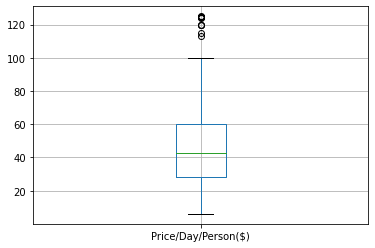

In [44]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered3.boxplot(column='Price/Day/Person($)', return_type='axes')

### TOP 10 Suburbs (for serviced apartments only)

In [45]:
# Grouping apartments on suburbs and finding average price/day and get top 10 suburbs.
grouped_top = outlier_filtered3.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Northcote          50.750000
Melbourne          54.341364
South Yarra        54.400000
Collingwood        56.750000
Brighton           57.500000
Carlton            57.927500
Port Melbourne     91.750000
Richmond          115.000000
Brunswick East    119.800000
Abbotsford        125.000000
Name: Price/Day/Person($), dtype: float64

In [46]:
# Checking with median values
grouped_top_median = outlier_filtered2.groupby("Suburbs")['Price/Day/Person($)'].median().sort_values().tail(10)
grouped_top_median

Suburbs
Richmond          44.500
Yarraville        44.750
East Melbourne    44.875
Brunswick East    45.000
Fitzroy North     45.000
South Yarra       45.000
Windsor           45.000
Albert Park       47.500
Cremorne          47.600
Fitzroy           50.000
Name: Price/Day/Person($), dtype: float64

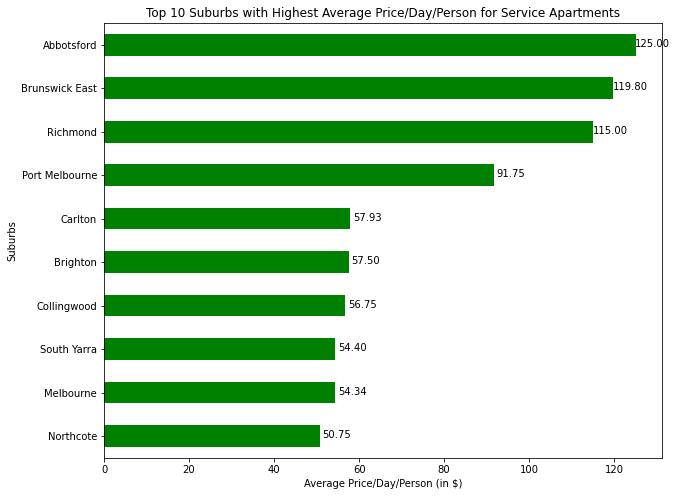

In [47]:
# Plot the top 10 suburbs with highest averageper/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Top 10 Suburbs with Highest Average Price/Day/Person for Service Apartments")
for b in bplot.patches:
    width = b.get_width()
    plt.text(4+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.savefig("Presentation Slides/Price_Output/ServApt_Top10_Price.png")

In [48]:
# convert top10 dataseries to a Dataframe
top_servapt_DF=pd.DataFrame(grouped_top)
top_servapt_DF.reset_index(level=0, inplace=True)
top_servapt_DF

,Suburbs,Price/Day/Person($)
0,Northcote,50.750000
1,Melbourne,54.341364
2,South Yarra,54.400000
3,Collingwood,56.750000
4,Brighton,57.500000
5,Carlton,57.927500
6,Port Melbourne,91.750000
7,Richmond,115.000000
8,Brunswick East,119.800000
9,Abbotsford,125.000000


In [49]:
# Print Output Data.
print("Top 10 Suburbs with Highest Average Price/Day/Person for serviced Apartments: ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=top_servapt_DF.iloc[i,0]
    suburb_price=round(top_servapt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average price/day/person of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day/Person for serviced Apartments: 
-----------------------------------------
Northcote has an average price/day/person of $51.0
Melbourne has an average price/day/person of $54.0
South Yarra has an average price/day/person of $54.0
Collingwood has an average price/day/person of $57.0
Brighton has an average price/day/person of $58.0
Carlton has an average price/day/person of $58.0
Port Melbourne has an average price/day/person of $92.0
Richmond has an average price/day/person of $115.0
Brunswick East has an average price/day/person of $120.0
Abbotsford has an average price/day/person of $125.0


## BOTTOM 10 Suburbs (for serviced apartments only)

In [50]:
# Grouping apartments on suburbs and finding average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered3.groupby("Suburbs")['Price/Day/Person($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Kensington         21.600000
North Melbourne    28.195385
East Melbourne     31.110000
Balaclava          34.000000
Docklands          36.256400
Caulfield North    38.750000
South Melbourne    39.610000
West Melbourne     42.191500
St Kilda           42.273077
Kew                44.000000
Name: Price/Day/Person($), dtype: float64

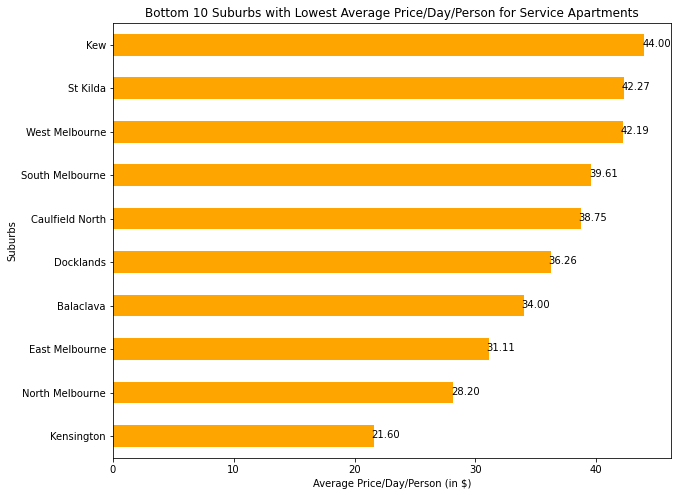

In [51]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day/Person (in $)")
plt.title("Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(1+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.savefig("Presentation Slides/Price_Output/ServApt_Bottom10_Price.png")

In [52]:
# convert bottom 10 dataseries to a Dataframe
bottom_servapt_DF=pd.DataFrame(grouped_bottom)
bottom_servapt_DF.reset_index(level=0, inplace=True)
bottom_servapt_DF

,Suburbs,Price/Day/Person($)
0,Kensington,21.600000
1,North Melbourne,28.195385
2,East Melbourne,31.110000
3,Balaclava,34.000000
4,Docklands,36.256400
5,Caulfield North,38.750000
6,South Melbourne,39.610000
7,West Melbourne,42.191500
8,St Kilda,42.273077
9,Kew,44.000000


In [53]:
# Print Output Data.
print("Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=bottom_servapt_DF.iloc[i,0]
    suburb_price=round(bottom_servapt_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average Price/Day/Person of ${suburb_price}")

Bottom 10 Suburbs with Lowest Average Price/Day/Person for Service Apartments are : 
-----------------------------------------
Kensington has an average Price/Day/Person of $22.0
North Melbourne has an average Price/Day/Person of $28.0
East Melbourne has an average Price/Day/Person of $31.0
Balaclava has an average Price/Day/Person of $34.0
Docklands has an average Price/Day/Person of $36.0
Caulfield North has an average Price/Day/Person of $39.0
South Melbourne has an average Price/Day/Person of $40.0
West Melbourne has an average Price/Day/Person of $42.0
St Kilda has an average Price/Day/Person of $42.0
Kew has an average Price/Day/Person of $44.0
